# CST 407 ML - Assignment 1 - part 2

_Code drawn from Chapter 1 – The Machine Learning landscape_


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))

    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [4]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [5]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [6]:
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

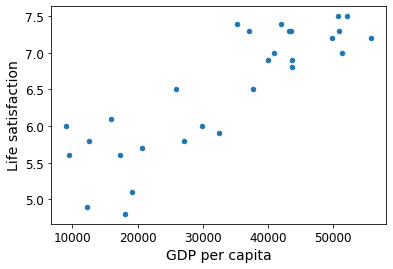

[[5.96242338]]


In [7]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

# Your turn...

Goal:  Predict life satisfaction based on country attributes (beyond GDP)

Note:  Do not modify the code above for this part.  Instead add code below that adds/modifies results.

Problem 1 Instructions:
1. Visit kaggle.com and explore data sets available for  by country
2. Find and import a data set giving population density per country
3. Evaluate the correlation between population density and life satisfaction
4. Train a model to predict life satisfaction, based on population density 
5. Measure and compare the accuracy of predictions based on population density to those based on GDP
6. Predict the life satisfaction for Cyprus, based on population density
7. How is this result different from the result obtained based on GDP?

Problem 2 Instructions:
1. Train a model to predict life satisfaction, based on both GDP and population density 
2. Measure and compare the accuracy of predictions based on both attributes to those obtained soley based on GDP or population density
3. Predict the life satisfaction for Cyprus, based on both GDP and population density
4. How is this result different from the result obtained soley based on GDP or population density?

Extra Credit:
1. Seek additional country attributes and attempt to achieve a higher accuracy in predicting life satisfaction
2. Explain your approach, results and conclusions

**Problem 1**  

In [11]:
# load data for population density and join it with GDP / Life satisfaction
# downloaded "csvData.csv" into previously created 'datasets/lifesat/' directory
#     from URL:    'https://www.kaggle.com/varpit94/world-population-density'
#
wpd = pd.read_csv(datapath + "csvData.csv", thousands=',') # wpd -- world population density

# merging
wpd.set_index("name", inplace=True)  # inplace=True modifies existing DataFrame (wpd) instead of creating a new DataFrame
lifesat_with_wpd = pd.merge(left=country_stats, right=wpd, left_index=True, right_index=True)
lifesat_with_wpd.head()

,GDP per capita,Life satisfaction,cca2,pop2021,pop2020,pop2050,pop2030,pop2019,pop2015,pop2010,pop2000,pop1990,pop1980,pop1970,area,Density,GrowthRate,WorldPercentage,rank
Russia,9054.914,6.0,RU,145912.025,145934.462,135824.481,143347.515,145872.256,144985.057,143479.274,146404.903,147531.561,138053.150,130148.653,17098242,8.5337,0.9998,0.0185,9
Turkey,9437.372,5.6,TR,85042.738,84339.067,97139.570,89157.785,83429.615,78529.409,72326.988,63240.194,53921.760,43975.971,34876.303,783562,108.5335,1.0083,0.0108,17
Hungary,12239.894,4.9,HU,9634.164,9660.351,8470.230,9338.446,9684.679,9777.923,9927.370,10220.507,10377.137,10754.286,10366.105,93028,103.5620,0.9973,0.0012,95
Poland,12495.334,5.8,PL,37797.005,37846.611,33294.567,36944.563,37887.768,38034.079,38329.781,38556.693,37960.193,35539.720,32639.258,312679,120.8812,0.9987,0.0048,39
Estonia,17288.083,5.6,EE,1325.185,1326.535,1158.408,1279.962,1325.648,1315.325,1332.101,1399.112,1565.246,1474.439,1360.202,45227,29.3007,0.9990,0.0002,156


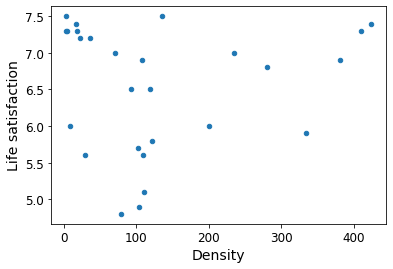

Life satisfaction    1.000000
GDP per capita       0.862787
GrowthRate           0.709263
area                 0.108016
rank                 0.105368
Density              0.065156
pop2050              0.056394
pop2030              0.031096
pop2021              0.018247
WorldPercentage      0.017852
pop2020              0.016987
pop2019              0.015822
pop2015              0.011824
pop2010              0.006901
pop2000             -0.006697
pop1970             -0.015613
pop1990             -0.020272
pop1980             -0.022131
Name: Life satisfaction, dtype: float64

In [23]:
# Correlate population density and life satisfaction
lifesat_with_wpd.plot(kind='scatter', x="Density", y='Life satisfaction')
plt.show()

#
cormat = lifesat_with_wpd.corr()  # cormat -- correlation matrix
cormat["Life satisfaction"].sort_values(ascending=False)

_"How well do population density and life satisfaction correlate?"_
    
    Given the value of correlation between the two factors is 0.065 (6.5%), I would would say not well. Better factors for considering strong correlations would clearly be rank, area, and growth rate with the grow rath dominating the others in magnitude.
    

In [26]:
# Train a model to predict life satisfaction, based on population density
# data loading     -- previously completed with merge
# data preparation -- partially completed with merge
x_density = np.c_[lifesat_with_wpd["Density"]]
y = np.c_[lifesat_with_wpd["Life satisfaction"]]

# visualization
#lifesat_with_wpd.plot(kind='scatter', x="Density", y='Life satisfaction')
#plt.show()

# model selection
model_density = sklearn.linear_model.LinearRegression()

# model training
model_density.fit(x_density, y)

LinearRegression()

MSE based on GDP =  0.1806533333945277


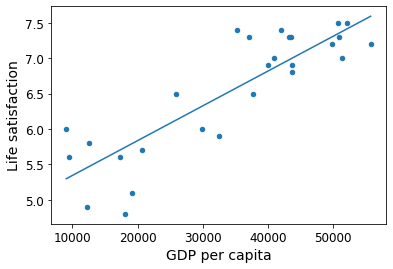

MSE based on pop. density =  0.7029290424487645


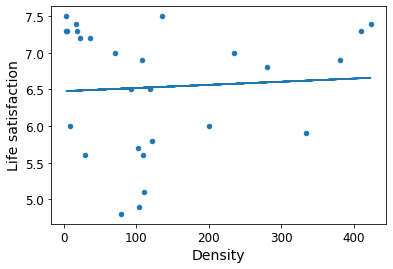

In [38]:
# Measure and compare the accuracy of predictions based on population density to those based on GDP
x_gdp = np.c_[lifesat_with_wpd["GDP per capita"]]
x_density = np.c_[lifesat_with_wpd["Density"]]
model_gdp = model;  # from above -- model trained with GDP data
model_density = sklearn.linear_model.LinearRegression()
model_density.fit(x_density, y)

# testing each GDP value to predict life sat. score based on model trained by the same GDP values
predicted_gdp = model_gdp.predict(x_gdp)

# verification of array shapes -- debugging
#print(y.shape)
#print(x_gdp.shape)
#print(predicted_gdp.shape)

# numpy overloaded '-' and '**' operators are blessings <3
mse_gdp = ((y - predicted_gdp)**2).sum() / y.size
print("MSE based on GDP = ", mse_gdp)

lifesat_with_wpd.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.plot(x_gdp, model_gdp.intercept_ + model_gdp.coef_*x_gdp)
plt.show()

#
# calculating total error from MSE for model trained on population density
#
predicted_density = model_density.predict(x_density)

mse_density = ((y - predicted_density)**2).sum() / y.size
print("MSE based on pop. density = ", mse_density)

lifesat_with_wpd.plot(kind='scatter', x="Density", y='Life satisfaction')
plt.plot(x_density, model_density.intercept_ + model_density.coef_*x_density)
plt.show()

_"How accurate are predictions based on population density to those based on GDP?"_
    
    MSE based on population density (0.7) is almost four times greater than that based on GDP (0.18), another indicator that population density is an unreliable predictor of life satisfaction.
    

In [40]:
# Predict the life satisfaction for Cyprus, based on population density
wpd.at["Cyprus", "Density"]  # wpd -- world population density pandas DataFrame from above

131.4003

_"How is this result different from the result obtained based on GDP?"_
    
    <type your answer here>
    

**Problem 2**

In [25]:
# Train a model to predict life satisfaction, based on both GDP and population density


In [28]:
# Measure and compare the accuracy of predictions based on both attributes to those obtained soley based on GDP or population density


_"How accurate are predictions based on both attributes to those obtained soley based on GDP or population density?"_
    
    <type your answer here>
    

In [27]:
# Predict the life satisfaction for Cyprus, based on both GDP and population density


_"How is this result different from the result obtained soley based on GDP or population density?"_
    
    <type your answer here>
    

**Extra Credit**

In [25]:
# your code here; feel free to add additional cells as needed


_"Explain your approach, results and conclusions."_
    
    <type your answer here>
    